# Análisis de Clasificación

---------------
## Tabla de contenido
---------------

* Definición
* Regresión Logística
* Uso de libreria Scikit learn
* Métricas
* Métodos de clasificación

---------------
## Definición
---------------



Un problema de clasificación es un tipo de problema en el que el objetivo es asignar una categoría o etiqueta a una entrada dada, basándose en sus características o atributos observados. La tarea principal es clasificar los elementos de un conjunto en clases predefinidas. Existen dos tipos principales de problemas de clasificación:



* Clasificación binaria:

    En este tipo de clasificación, el objetivo es asignar cada instancia a una de las dos clases posibles. Por ejemplo, determinar si un correo electrónico es spam o no spam, predecir si un paciente tiene una enfermedad específica o no, etc.

* Clasificación multiclase o multinomial:

    En este tipo de clasificación, hay más de dos clases posibles, y el objetivo es asignar cada instancia a una de las múltiples clases. Ejemplos incluyen reconocimiento de dígitos escritos a mano (0-9), clasificación de especies de animales, reconocimiento de idiomas, etc.


---------------
## Regresión Logística
---------------


La regresión logística es un modelo estadístico utilizado para predecir la probabilidad de que una variable dependiente binaria (con dos categorías) tenga un valor de 1 o 0 en función de una o más variables independientes. 

### Definición del problema
* Identificar la variable dependiente (o respuesta) y las variables independientes (o predictores) en tu conjunto de datos.
* La variable dependiente debe ser binaria, es decir, tener dos categorías (por ejemplo, sí/no, éxito/fracaso, 1/0).

### Modelo
El modelo de regresión logística utiliza la función logit para modelar la relación entre las variables independientes y la probabilidad de que la variable dependiente sea 1 (presencia de la caracteristicas objetivo del problema de investigación).


La función logit transforma la probabilidad $p$ en el rango de $({-\infty,\infty})$ y se define como 

$logit({p})=log({\frac{p}{1-p}})$

### Estimación de parámetros
Se utilizan métodos como el máximo verosimilitud (likelihood) para estimar los parámetros del modelo, que son los coeficientes asociados a cada variable independiente.

#### máxima verosimilitud (likelihood)

Su objetivo del método de máxima verosimilitud es encontrar los valores de los parámetros que maximizan la función de verosimilitud, que mide la probabilidad de observar los datos dados ciertos valores específicos de los parámetros siguiendo unos los siguientes pasos:

1. Definición del modelo 

Comienza con la definición de un modelo estadístico que describe la distribución de los datos. Este modelo tiene parámetros que deben ser estimados.
Función de verosimilitud:

2. La función de verosimilitud 

La función de verosimilitud $(L)$ describe la probabilidad de observar los datos dados ciertos valores de los parámetros. Se denota comúnmente como $L(\theta|\text{datos})$, donde $\theta$ representa el conjunto de parámetros del modelo.

3. Logaritmo de la función de verosimilitud (log-verosimilitud):

Para facilitar el cálculo, se suele trabajar con el logaritmo natural de la función de verosimilitud. Esto no afecta la maximización, ya que el logaritmo es una función monótona creciente. La función de log-verosimilitud se denota como  $l(\theta|\text{datos}) = log(L(\theta|\text{datos}) )$

4. Maximización de la log-verosimilitud:

El objetivo es encontrar los valores de los parámetros que maximizan la función de log-verosimilitud. Esto se puede hacer utilizando métodos de optimización, como el descenso de gradiente, o resolviendo las ecuaciones derivadas de la función de log-verosimilitud igualadas a cero.

5. Estimación de los parámetros:

Los valores que maximizan la función de log-verosimilitud se utilizan como estimaciones de los parámetros del modelo. Estas estimaciones son llamadas estimadores de máxima verosimilitud (MLE).

4. Propiedades asintóticas:

En condiciones asintóticas (con un número grande de observaciones), los estimadores de máxima verosimilitud exhiben propiedades deseables, como ser insesgados y eficientes.

NOTA : 
* El **descenso de gradiente** aborda este problema ajustando iterativamente los parámetros en la dirección opuesta al gradiente de la función de log-verosimilitud. El gradiente indica la dirección de mayor aumento de la función, por lo que moverse en dirección opuesta nos acerca al máximo de la función.
* La **tasa de aprendizaje** controla cuánto se ajustan los parámetros en cada iteración. Se debe ajustar cuidadosamente para garantizar que el algoritmo converja de manera eficiente sin excederse.Un valor de tasa de aprendizaje más grande permite pasos más grandes, pero puede hacer que el algoritmo diverja o falle en converger. Un valor más pequeño permite pasos más pequeños, pero puede hacer que el proceso de convergencia sea lento.

### Función de decisión

La función de decisión se calcula como la combinación lineal de las variables independientes ponderadas por los coeficientes estimados. Para un caso binario, se puede expresar como 

$logit({p})=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_nX_n$

### Transformación logística inversa
Para obtener la probabilidad de que la variable dependiente sea 1, aplicamos la transformación logística inversa, que es la función sigmoide

$p = \frac{1}{1+e^{-logit(p)}}$

### Umbral de decisión

Se establece un umbral de decisión (generalmente 0.5 pero existen métodos sofisticados para encontrar el mejor umbral) para clasificar las observaciones en las dos categorías.

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_func_sigmoidal(umbral = 0.5):
    # Función sigmoidal
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Generar datos para la gráfica
    x_values = np.linspace(-7, 7, 100)
    y_values = sigmoid(x_values)

    # Graficar la función sigmoidal
    plt.plot(x_values, y_values, label='Sigmoidal')
    plt.axhline(y=umbral, color='r', linestyle='--', label='Umbral de decisión ({})'.format(umbral))
    # plt.axvline(x=0, color='g', linestyle='--', label='Valor de umbral (0)')

    # Etiquetas y leyenda
    plt.xlabel('Eje X')
    plt.ylabel('Función Sigmoidal')
    plt.title('Función Sigmoidal')
    plt.legend()

    # grilla
    plt.grid()

    # Mostrar la gráfica
    plt.show()


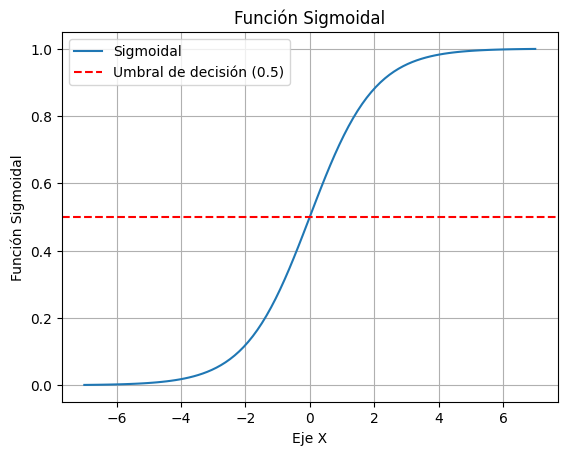

In [6]:
plot_func_sigmoidal(0.5)

### Ejemplo

In [7]:
# Datos de ejemplo
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5], [1, 6]])
y = np.array([0, 0, 1, 1, 1])

In [8]:
# Función logística
def sigmoid(z):
    p = 1 / (1 + np.exp(-z))
    return p

# Función de log-verosimilitud
def log_likelihood(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    likelihood = y * np.log(h) + (1 - y) * np.log(1 - h)
    return np.sum(likelihood) / m

# Gradiente de la log-verosimilitud
def gradient(X, y, theta):
    m = len(y)
    z = np.dot(X, theta)
    h = sigmoid(z)
    grad = np.dot(X.T, (h - y)) / m
    return grad

# Descenso de gradiente para la maximización de la log-verosimilitud
def gradient_descent(X, y, theta, learning_rate, epochs):
    for _ in range(epochs):
        grad = gradient(X, y, theta)
        theta -= learning_rate * grad
    return theta

In [9]:
# Agregar una columna de unos a X para el término de sesgo
X = np.c_[np.ones(X.shape[0]), X]

# Inicialización de parámetros
theta = np.zeros(X.shape[1])
print("Parámetros iniciados:", theta)


Parámetros iniciados: [0. 0. 0.]


In [10]:
# Hiperparámetros
learning_rate = 0.01
epochs = 1000

# Estimación de parámetros mediante máxima verosimilitud
theta = gradient_descent(X, y, theta, learning_rate, epochs)
print("Parámetros estimados:", theta)

Parámetros estimados: [-0.88913281 -0.88913281  0.66569816]


In [11]:
# Función para hacer predicciones
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    predictions = (probabilities >= threshold).astype(int)
    return predictions


In [12]:

# nuevos datos
new_data = np.array([[1, 3], [1, 5], [2, 7], [0, 0], [0, 0]])
# Agregar una columna de unos a X para el término de sesgo
new_data = np.c_[np.ones(new_data.shape[0]), new_data]
# con los parametros estimados realizar predicciones
predictions = predict(new_data, theta)

print("Predicciones para nuevos datos:", predictions)


Predicciones para nuevos datos: [1 1 1 0 0]


---------------
## Uso de libreria Scikit learn
---------------


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Crear un conjunto de datos ficticio
np.random.seed(42) # semilla aleatoria

data = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 1000),
    'feature2': np.random.normal(0, 1, 1000),
    'target': np.random.choice([0, 1], size=1000)
})

In [15]:
data.head()

,feature1,feature2,target
0,0.496714,1.399355,1
1,-0.138264,0.924634,0
2,0.647689,0.059630,1
3,1.523030,-0.646937,0
4,-0.234153,0.698223,0


In [16]:
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
X = data[['feature1', 'feature2']]
y = data['target']

In [17]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(
    max_iter = 100000, #cantidad de maxima de iteracion
    solver = 'liblinear', # opt
    random_state=20090630 # semilla aleatoria
    )

In [18]:

model.fit(X, y)

LogisticRegression(max_iter=100000, random_state=20090630, solver='liblinear')

In [19]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X)

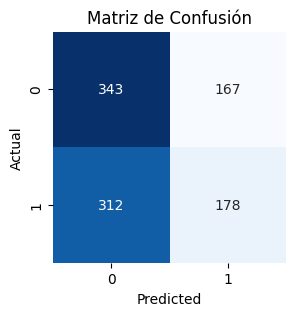

In [20]:
# Evaluar el rendimiento con una matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

In [21]:
classification_rep = classification_report(y, y_pred)
print('Classification Report:\n', classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.67      0.59       510
           1       0.52      0.36      0.43       490

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.51      1000
weighted avg       0.52      0.52      0.51      1000



---------------
## Métricas
---------------

### Matriz de confusión

<img src=https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg>


La matriz de confusión es una herramienta utilizada en el campo de la clasificación de problemas de aprendizaje automático y estadística para visualizar el desempeño de un modelo de clasificación. En una matriz de confusión, las filas representan las clases reales y las columnas representan las clases predichas por el modelo. Para una clasificación binaria, la matriz de confusión tiene cuatro términos:
    

    * Verdaderos positivos (TP): son los casos en los que el modelo predijo correctamente una clase positiva.
    * Falsos positivos (FP): son los casos en los que el modelo predijo incorrectamente una clase positiva cuando la verdadera clase era negativa.
    * Verdaderos negativos (TN): son los casos en los que el modelo predijo correctamente una clase negativa.
    * Falsos negativos (FN): son los casos en los que el modelo predijo incorrectamente una clase negativa cuando la verdadera clase era positiva.

    EJEMPLO

In [22]:
# 1- importar la funcion
from sklearn.metrics import confusion_matrix
# 2 - aplicar la función con las Y observadas y las predicciones
conf_matrix = confusion_matrix(y,y_pred)
# 3 -mostrar el resultado de la evaluación
print('confusion matrix: \n',conf_matrix)

confusion matrix: 
 [[343 167]
 [312 178]]


### Accuracy

Es la proporción de casos correctamente clasificados sobre el total de casos. 

    * Mide la capacidad global del modelo para predecir correctamente las clases.
    * Proporciona una visión general del rendimiento del modelo, pero puede ser engañosa si hay un desequilibrio de clases en los datos.

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$ 

    EJEMPLO

In [23]:
# 1- importar la funcion
from sklearn.metrics import accuracy_score
# 2 - aplicar la función con las Y observadas y las predicciones
accuracy = accuracy_score(y,y_pred)
# 3 -mostrar el resultado de la evaluación
print('accuracy : {}'.format(accuracy))

accuracy : 0.521


### Precision

Es la proporción de verdaderos positivos sobre todos los casos que se predijeron como positivos . 

    * Mide la exactitud de las predicciones positivas del modelo.
    * Es útil cuando es crucial minimizar los falsos positivos.

$Precision = \frac{TP}{TP + FP}$  

    EJEMPLO

In [24]:
# 1- importar la funcion
from sklearn.metrics import precision_score
# 2 - aplicar la función con las Y observadas y las predicciones
precision = precision_score(y,y_pred)
# 3 -mostrar el resultado de la evaluación
print('precision : {}'.format(precision))

precision : 0.5159420289855072


### Recall 

Es la proporción de verdaderos positivos sobre todos los casos que son realmente positivos. 

    * Mide la capacidad del modelo para identificar correctamente todas las instancias relevantes.
    * Es útil cuando es importante capturar todos los casos positivos y minimizar los falsos negativos

$Recall  = \frac{TP}{TP + FN}$  

    EJEMPLO

In [27]:
# 1- importar la funcion
from sklearn.metrics import recall_score 
# 2 - aplicar la función con las Y observadas y las predicciones
recall = recall_score(y,y_pred)
# 3 -mostrar el resultado de la evaluación
print('recall : {}'.format(recall))

recall : 0.363265306122449


### F1-Score 

Es una medida de precisión y recall ponderada. 

    * Esta métrica combina tanto la precisión como el recall en una sola medida. 
    * Es útil cuando se necesita un equilibrio entre precision y recall.

$F1 Score  =2 \times \frac{precision \times recall}{precision + recall}$

    EJEMPLO

In [28]:
# 1- importar la funcion
from sklearn.metrics import f1_score 
# 2 - aplicar la función con las Y observadas y las predicciones
f1 = f1_score(y,y_pred)
# 3 -mostrar el resultado de la evaluación
print('f1_score : {}'.format(f1))

f1_score : 0.4263473053892216


### Área bajo la curva ROC

Es el área bajo la curva característica de operación del receptor (ROC). 

    * Representa la capacidad del modelo para discriminar entre clases positivas y negativas.
    * Una puntuación ROC AUC más alta indica un mejor rendimiento del modelo.
    * Poporciona una evaluación del rendimiento del modelo en un rango de umbrales de clasificación y es robusto frente a desequilibrios de clases.

**La curva ROC (Receiver Operating Characteristic) es una representación gráfica del rendimiento de un modelo de clasificación que muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en diferentes umbrales de clasificación.**


* TPR (Tasa de Verdaderos Positivos) es la proporción de instancias positivas que se clasificaron correctamente como positivas.

$TPR = \frac{TP}{TP+FN}$  

* FPR (Tasa de Falsos Positivos) es la proporción de instancias negativas que se clasificaron incorrectamente como positivas.

$FPR = \frac{FP}{FP+TN}$  

En la curva ROC, el eje x representa la tasa de falsos positivos (FPR), mientras que el eje y representa la tasa de verdaderos positivos (TPR). Cada punto en la curva ROC corresponde a un umbral de clasificación diferente. Idealmente, un modelo de clasificación perfecto tendría un TPR de 1 y un FPR de 0, lo que llevaría a la esquina superior izquierda del gráfico

**La fórmula para el área bajo la curva ROC (ROC AUC) es una medida de rendimiento utilizada en problemas de clasificación. La curva ROC (Receiver Operating Characteristic) representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) para diferentes umbrales de clasificación**

$ROC AUC = \int_{0}^{1} TPR(FPR) \,dFPR$

    EJEMPLO

In [29]:
# 1- importar la funcion
from sklearn.metrics import roc_auc_score 
# 2 - aplicar la función con las Y observadas y las predicciones
roc_auc = roc_auc_score(y,model.predict_proba(X)[:,1], multi_class='ovr')
# 3 -mostrar el resultado de la evaluación
print('roc_auc : {}'.format(roc_auc))

roc_auc : 0.5216206482593038


---------------
## Métodos de Clasificación
---------------

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
# Cargar el conjunto de datos diabetes
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Árbol de Decisión

* Los árboles de decisión para clasificación son modelos interpretables porque las decisiones tomadas por el modelo tienen una estructura lógica y cada nodo utiliza una condición basada en una sola característica que es fácil de entender. 
* Sin embargo, pueden ser propensos al sobreajuste, especialmente si se les permite crecer demasiado complejos sin restricciones.

    * Inicio del Árbol: Se comienza con todos los datos en un único nodo, conocido como el nodo raíz.

    * División del Nodo (Splitting): Se selecciona la mejor variable y el punto de corte (split point) dentro de esa variable para dividir los datos en dos grupos. El objetivo es reducir la variabilidad de los valores de la variable objetivo dentro de cada grupo. Para la regresión, la variabilidad suele medirse con el MSE (Mean Squared Error) o la varianza; el objetivo es minimizar esta métrica al realizar cada división.

    * Creación de Nodos Hijos: Una vez que se ha hecho una división, se crean dos nuevos nodos, cada uno con un subconjunto de los datos basado en la división. Este proceso se repite de manera recursiva.

    * Condición de Parada: El árbol sigue creciendo hasta que se alcanza una condición de parada, que puede ser un número máximo de niveles, un número mínimo de muestras en un nodo, o una disminución mínima en la métrica de variabilidad.

    * Predicción: Una vez que se ha construido el árbol, se puede usar para hacer predicciones. Para predecir el valor de una nueva muestra, se sigue el árbol desde el nodo raíz, pasando por las divisiones según las características de la muestra hasta llegar a un nodo hoja. El valor predicho es el valor medio de la variable objetivo de las muestras de entrenamiento en ese nodo hoja.

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
# 3. Árbol de Decisión
tree_model = DecisionTreeClassifier(
    max_depth=3, # profundidad máxima del árbol, mayor profundidad puede capturar relaciones más complejas pero también puede llevar al sobreajuste
    min_samples_split=2, # Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que min_samples_split el nodo no se dividirá y se considerará una hoja
    min_samples_leaf=1 # Especifica el número mínimo de muestras requeridas para ser una hoja. Si la división de un nodo resulta en una hoja con un número de muestras menor que min_samples_leaf esa división no se realizará
    )

In [36]:
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

In [37]:
# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, tree_model.predict_proba(X_test)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación:
Accuracy: 0.9473684210526315
Precision: 0.9474739303990012
Recall: 0.9473684210526315
F1 Score: 0.9583333333333334
ROC AUC Score: 0.9574189321978381


#### grafico del arbol

In [38]:
from sklearn.tree import plot_tree

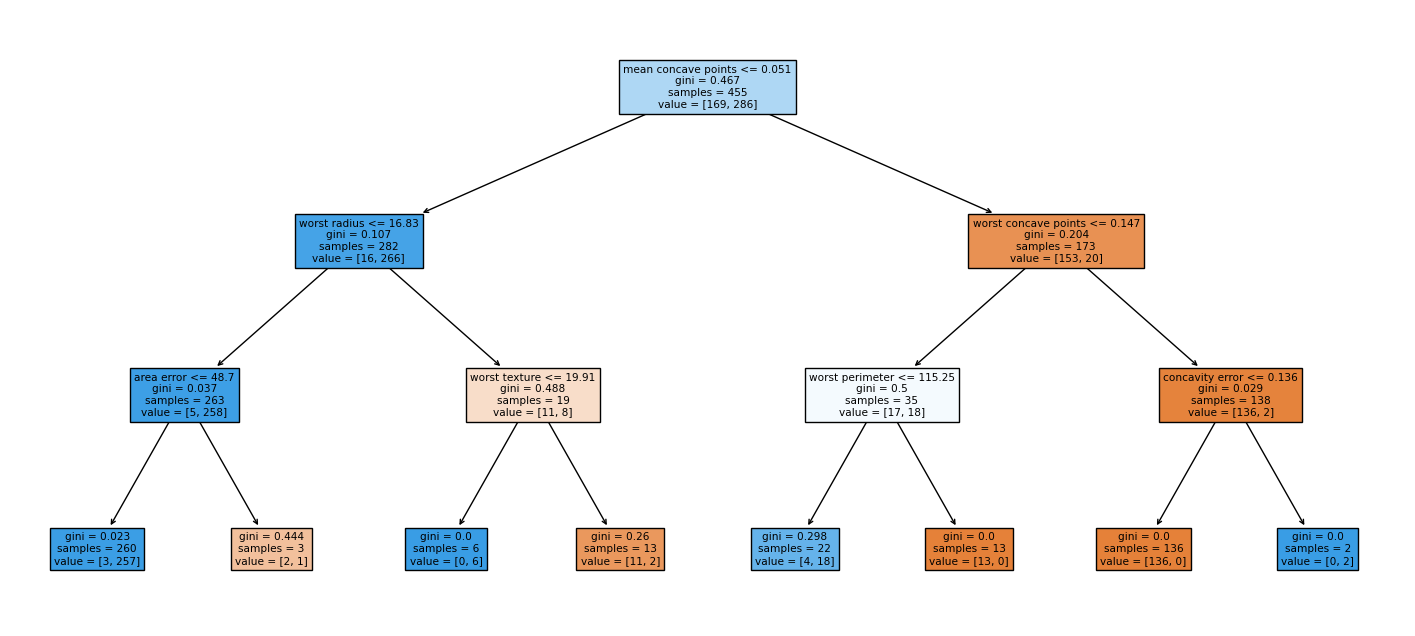

In [40]:
# Graficar el árbol
plt.figure(figsize=(18, 8))
plot_tree(tree_model, feature_names=cancer.feature_names, filled=True)
plt.show()

### Random Forest

    * El Random Forest es un algoritmo robusto y fácil de usar que proporciona buenos resultados en una variedad de conjuntos de datos. Es resistente al sobreajuste y no requiere mucho ajuste de hiperparámetros. 
    * Además, es eficiente en términos de tiempo de entrenamiento y es fácilmente paralelizable, lo que lo hace adecuado para conjuntos de datos grandes. 
    * Debido a sus propiedades, el Random Forest es uno de los algoritmos de aprendizaje automático más populares y ampliamente utilizados.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# 4. Random Forest
forest_model = RandomForestClassifier(
    n_estimators=100, # Especifica el número de árboles en el bosque.
    max_depth=5, # profundidad máxima de cada árbol en el bosque.
    min_samples_split=2,  # número mínimo de muestras requeridas para dividir un nodo interno en cada árbol
    min_samples_leaf=1 # número mínimo de muestras requeridas para ser una hoja en cada árbol
)

In [43]:
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

In [44]:
# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, forest_model.predict_proba(X_test)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación:
Accuracy: 0.9649122807017544
Precision: 0.9652053622194477
Recall: 0.9649122807017544
F1 Score: 0.9722222222222222
ROC AUC Score: 0.9963969865705863


### Support Vector Machine (SVM)

    * SVM es efectivo en espacios de características de alta dimensión y es capaz de manejar datos no lineales utilizando trucos del kernel, que mapean los datos a un espacio de características de mayor dimensión donde las clases son linealmente separables. 
    * SVM es un algoritmo poderoso y versátil que se utiliza en una variedad de aplicaciones, incluidas la clasificación de texto, la detección de imágenes, la clasificación de biosecuencias y más.
    * La tarea de SVM es resolver un problema de optimización convexa. Para la clasificación, esto implica encontrar los pesos y sesgos del hiperplano que maximizan el margen mientras minimizan la clasificación errónea. Para la regresión, se busca encontrar la función que minimiza el error entre las predicciones y los valores reales, manteniendo los errores dentro de un margen especificado.
    * Una vez que se encuentra el hiperplano óptimo, SVM utiliza una función de decisión para clasificar nuevos puntos de datos o hacer predicciones en el caso de la regresión. Para la clasificación, la función de decisión asigna un nuevo punto a una de las dos clases en función de su posición con respecto al hiperplano. Para la regresión, la función de decisión estima el valor de la variable objetivo para un nuevo punto de datos.

In [46]:
from sklearn.svm import SVC

In [47]:
# 5. Support Vector Machine (SVM)
svm_model = SVC(
    # El kernel determina cómo se mapean los datos de entrada en un espacio de mayor dimensión donde sea más fácil realizar la separación
    kernel='rbf', # Los kernels comunes son "linear" (lineal), "poly" (polinómico), "rbf" (función de base radial) y "sigmoid" (sigmoidal)
    # Parámetro de regularización que controla la penalización por errores de entrenamiento
    C=1.0, # Un valor más bajo de C permitirá un margen más amplio y permitirá que se clasifiquen más puntos correctamente, pero puede llevar al sobreajuste
    # Coeficiente de kernel para los kernels "rbf", "poly" y "sigmoid"
    gamma = 'scale' # lor más alto de gamma significa que los puntos de datos más cercanos tienen más peso en la predicción, lo que puede conducir a un modelo más ajustado a los datos de entrenamiento.
)

In [48]:

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [49]:
# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, svm_model.predict(X_test), multi_class='ovr')

print("\nMétricas de Evaluación:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación:
Accuracy: 0.9473684210526315
Precision: 0.9514695830485304
Recall: 0.9473684210526315
F1 Score: 0.9594594594594594
ROC AUC Score: 0.9302325581395349


### K Nearest Neighbors (KNN)

    * El algoritmo encuentra los k puntos de datos más cercanos en el conjunto de entrenamiento al punto de consulta. La cercanía se mide generalmente utilizando una métrica de distancia, como la distancia euclidiana o la distancia de Manhattan
    * KNN es un algoritmo simple y fácil de entender, pero puede ser computacionalmente costoso en conjuntos de datos grandes, ya que requiere calcular la distancia entre el punto de consulta y todos los puntos en el conjunto de entrenamiento.
    

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# 6. K Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(
    # Especifica el número k de vecinos que se utilizarán para hacer predicciones
    n_neighbors=5, # Un valor más alto de n_neighbors resultará en predicciones más suaves y menos sensibles al ruido, pero también puede reducir la capacidad del modelo para capturar patrones complejos en los datos
    #  Determina cómo se ponderan las contribuciones de los vecinos
    weights='distance',  # Puede ser "uniforme", donde todos los vecinos tienen el mismo peso en la predicción, o "distance", donde el peso de cada vecino es inversamente proporcional a su distancia desde el punto de consulta
    # Especifica el algoritmo utilizado para calcular los vecinos más cercanos.
    algorithm='auto' # Puede ser "auto", "ball_tree", "kd_tree" o "brute"
)

In [53]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [54]:
# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1], multi_class='ovr')

print("\nMétricas de Evaluación:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")


Métricas de Evaluación:
Accuracy: 0.956140350877193
Precision: 0.9590258541089566
Recall: 0.956140350877193
F1 Score: 0.9659863945578232
ROC AUC Score: 0.9937766131673764


---------------
## Bibligrafía
---------------

* https://scikit-learn.org/stable/
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
